# Consistent nodal loads
## Outcomes:
## 1. Understand how to model consistent nodal loads over multiple elements
## 2. Understand how point loads are applied between nodes
## 3. Understand how consistent nodal loads for body forces are computed

<img src="SV_Problem.jpg" style="width: 380px;"/>

# Model 1
## Structural thickness is 1mm
## T = 150/mm^2 and uniformly distributed
## Compute the consistent nodal loads for the following mesh:

<img src="SV_mesh_with_numbers.png" style="width: 380px;"/>

## Each element edge has a length of 2mm.
## Hence a total force of 300 N is applied per edge

In [8]:
1*2*150

300

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0010 seconds.
Done assembling K and F    :   0.0182 seconds.
Done solving system        :   0.0000 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0050 seconds.
Done post-processing stress:   0.0030 seconds.
Done writing output        :   0.0010 seconds.


<IPython.core.display.Javascript object>


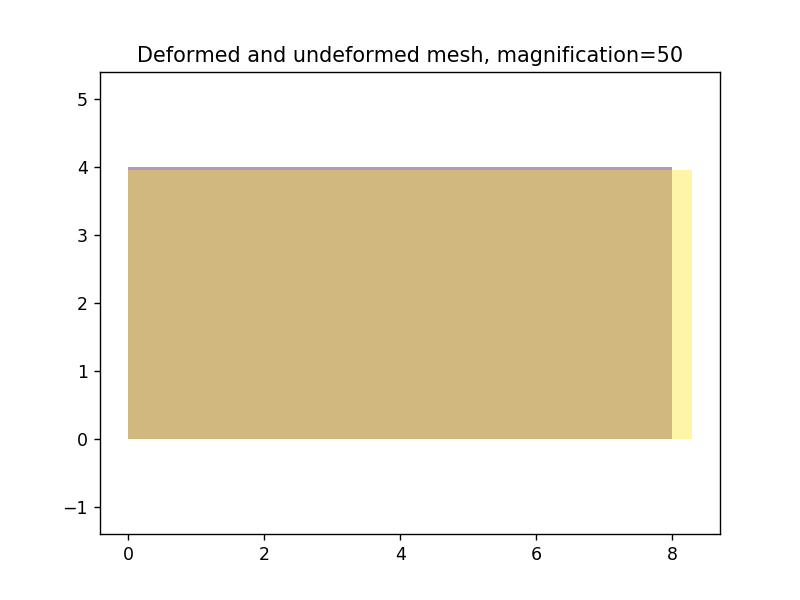

<IPython.core.display.Javascript object>


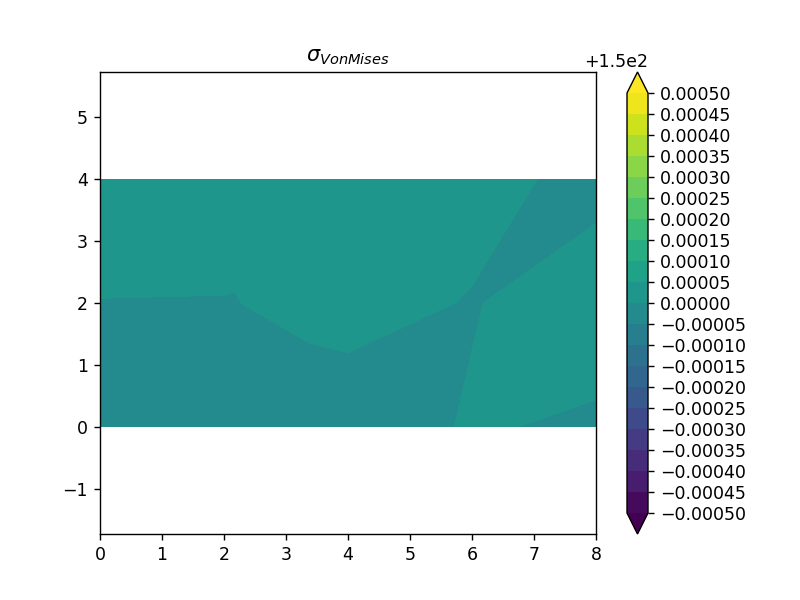

<IPython.core.display.Javascript object>


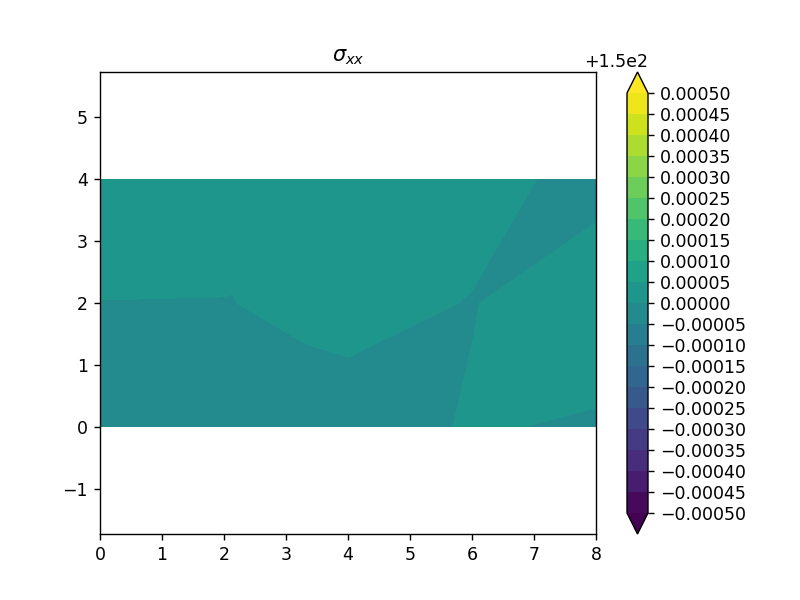

<IPython.core.display.Javascript object>


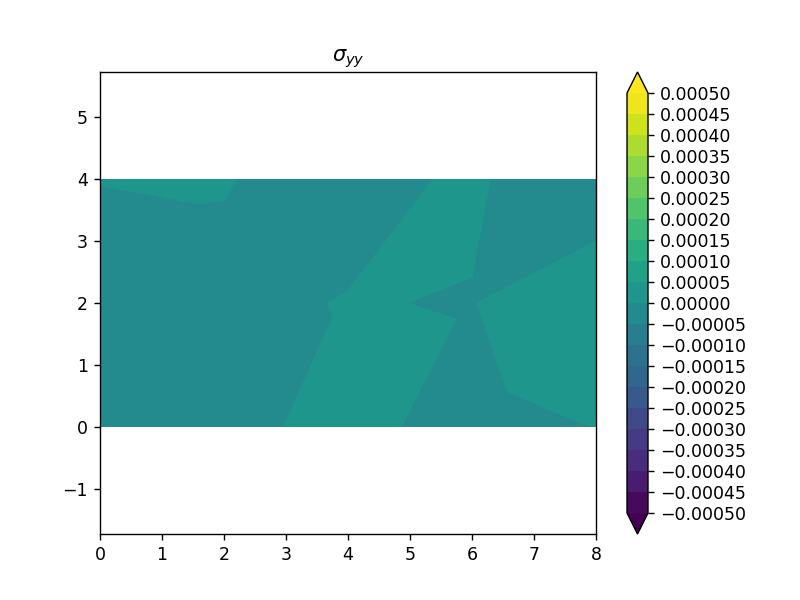

<IPython.core.display.Javascript object>


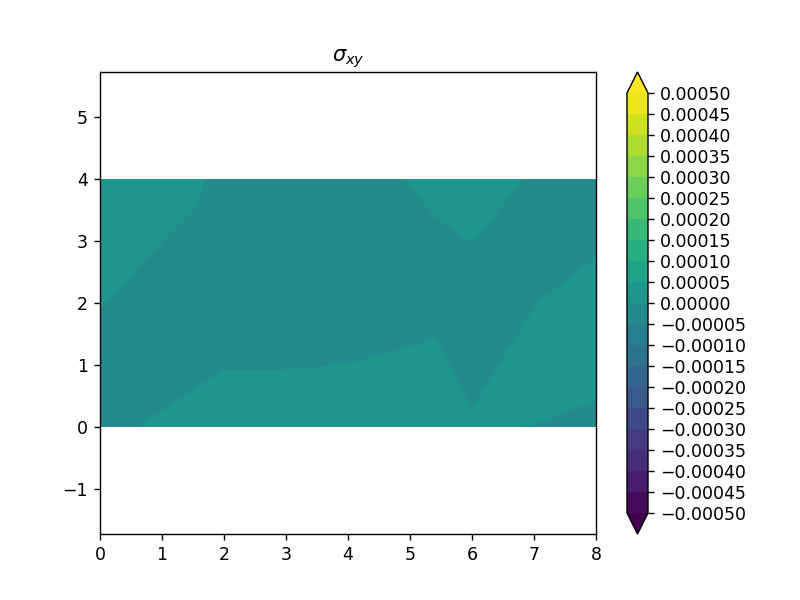

Individual Applied Reaction Forces 
 [[-5.00000000e+01]
 [ 1.20792265e-13]
 [-2.00000000e+02]
 [-1.00000000e+02]
 [-2.00000000e+02]
 [-5.00000000e+01]]
You can Confirm this distribution is the same as the consistent nodal load split - see next question

 Sum Reaction forces along x -599.9999999999984


In [150]:
%matplotlib notebook
import numpy as np

from fem_main_program import launch_fem
UIC, ReactionForcesIC, VonMisesIC, SXXIC, SYYIC, SXYIC = launch_fem('Q8_2x4_600N',MagFac=50)

print('Individual Applied Reaction Forces \n {}'.format(ReactionForcesIC))
print('You can Confirm this distribution is the same as the consistent nodal load split - see next question')

print('\n Sum Reaction forces along x {}'.format(np.sum(ReactionForcesIC)))

# Model 1
## Structural thickness is 1mm
## 1. Lets apply a point load of 1000N in the x-direction on any node on the right edge, e.g. node 37.
## 2. Lets apply a point load of 1000N in the x-direction anywhere on the right edge, e.g. halfway between node 37 and 28.
## Common strategy to apply point loads -> $\mathbf{N}^T[Px, Py]$ -> where $P_x$ and $P_y$ are the x and y directional point loads.

<img src="SV_mesh_with_numbers.png" style="width: 380px;"/>

### 1. Lets apply a point load of 1000N in the x-direction on any node on the right edge, e.g. node 37.

In [52]:
import sympy as sp
xi,eta =  sp.symbols('xi,eta')

N1 = -(1-xi)*(1-eta)*(1+xi+eta)/4
N2 = -(1+xi)*(1-eta)*(1-xi+eta)/4
N3 = -(1+xi)*(1+eta)*(1-xi-eta)/4
N4 = -(1-xi)*(1+eta)*(1+xi-eta)/4
N5 = (1-xi**2)*(1-eta)/2
N6 = (1+xi)*(1-eta**2)/2
N7 = (1-xi**2)*(1 + eta)/2
N8 = (1-xi)*(1 - eta**2)/2

N = sp.Matrix([[N1,0,N2,0,N3,0,N4,0,N5,0,N6,0,N7,0,N8,0],
               [0,N1,0,N2,0,N3,0,N4,0,N5,0,N6,0,N7,0,N8]])

# Local coordinate for Node 28 in top right element is xi = 1 and eta = 0.
# Px = 1000N and Py = 0
N.subs({xi:1,eta:1}).T*sp.Matrix([1000,0])

Matrix([
[   0],
[   0],
[   0],
[   0],
[1000],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0],
[   0]])

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0004 seconds.
Done assembling K and F    :   0.0150 seconds.
Done solving system        :   0.0010 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0050 seconds.
Done post-processing stress:   0.0040 seconds.
Done writing output        :   0.0020 seconds.


<IPython.core.display.Javascript object>


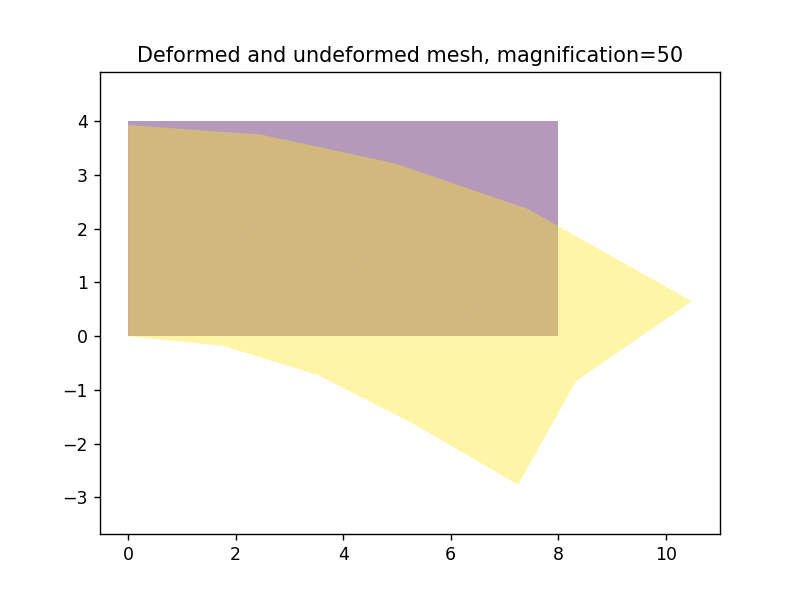

<IPython.core.display.Javascript object>


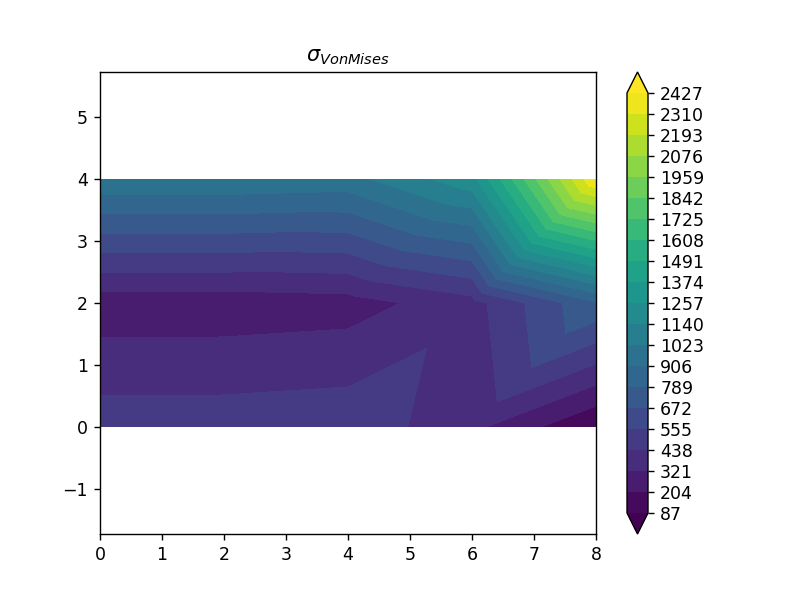

<IPython.core.display.Javascript object>


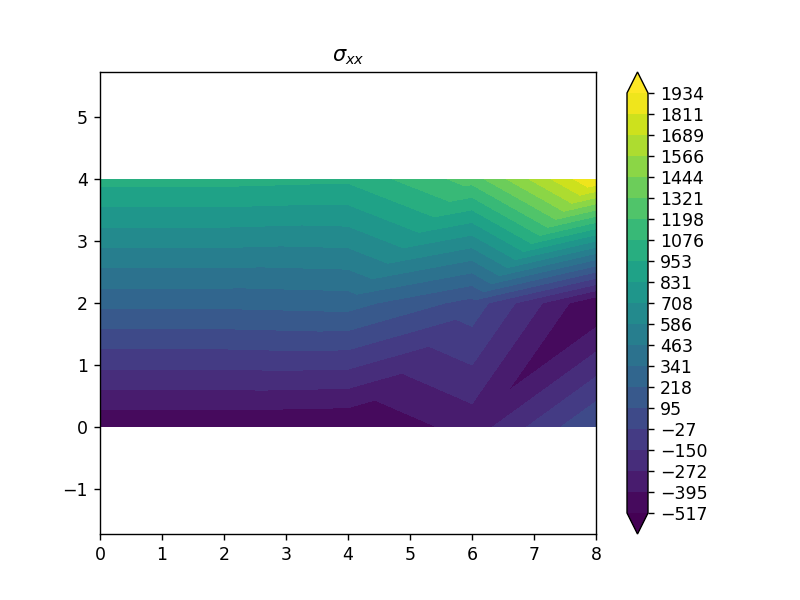

<IPython.core.display.Javascript object>


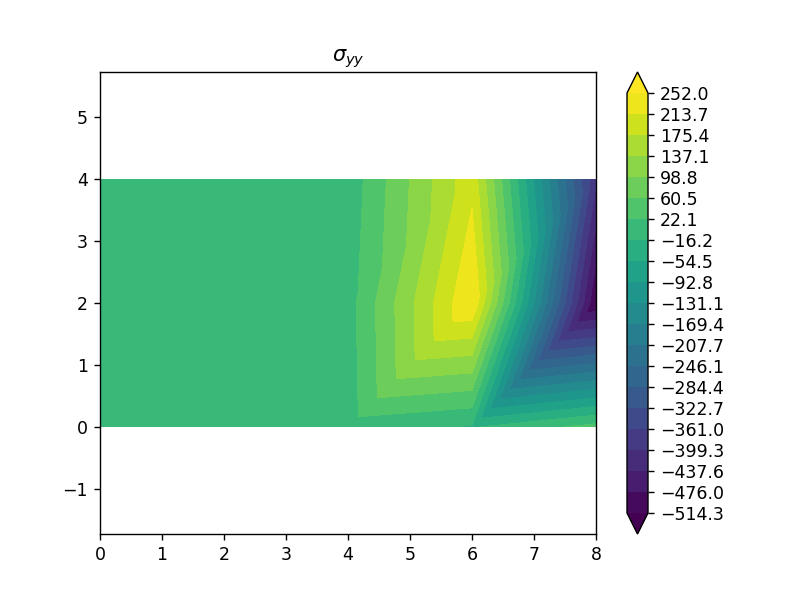

<IPython.core.display.Javascript object>


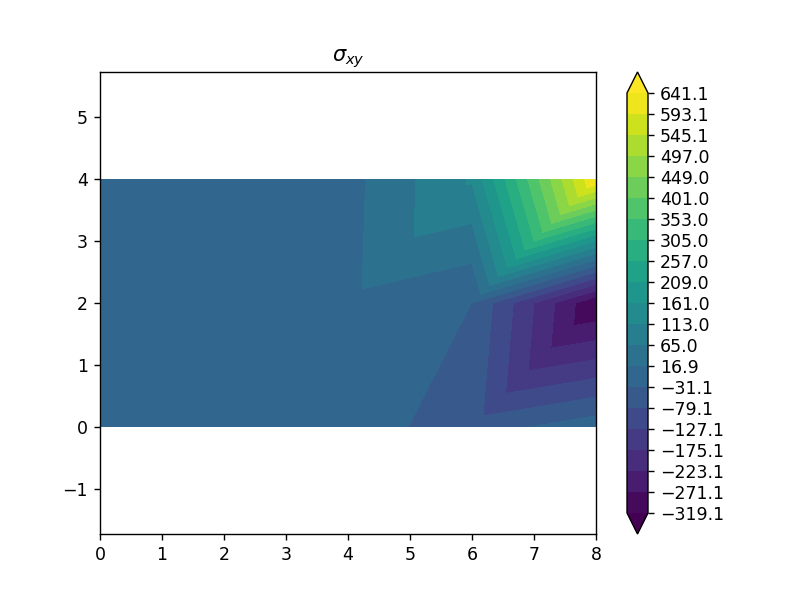

Individual Applied Reaction Forces 
 [[ 1.66597077e+02]
 [-5.74118530e-12]
 [ 1.67138774e+02]
 [-1.67412289e+02]
 [-8.32980053e+02]
 [-3.33343510e+02]]
You can Confirm this distribution is the same as the consistent nodal load split - see next question

 Sum Reaction forces along x -1000.0000000000058


In [151]:
%matplotlib notebook
import numpy as np

from fem_main_program import launch_fem
UIC, ReactionForcesIC, VonMisesIC, SXXIC, SYYIC, SXYIC = launch_fem('Q8_Point_1_1',MagFac=50)

print('Individual Applied Reaction Forces \n {}'.format(ReactionForcesIC))
print('You can Confirm this distribution is the same as the consistent nodal load split - see next question')

print('\n Sum Reaction forces along x {}'.format(np.sum(ReactionForcesIC)))

## 2. Lets apply a point load of 1000N in the x-direction anywhere on the right edge, e.g. halfway between node 37 and 28.

In [152]:
import sympy as sp
xi,eta =  sp.symbols('xi,eta')

N1 = -(1-xi)*(1-eta)*(1+xi+eta)/4
N2 = -(1+xi)*(1-eta)*(1-xi+eta)/4
N3 = -(1+xi)*(1+eta)*(1-xi-eta)/4
N4 = -(1-xi)*(1+eta)*(1+xi-eta)/4
N5 = (1-xi**2)*(1-eta)/2
N6 = (1+xi)*(1-eta**2)/2
N7 = (1-xi**2)*(1 + eta)/2
N8 = (1-xi)*(1 - eta**2)/2

N = sp.Matrix([[N1,0,N2,0,N3,0,N4,0,N5,0,N6,0,N7,0,N8,0],
               [0,N1,0,N2,0,N3,0,N4,0,N5,0,N6,0,N7,0,N8]])

# Local coordinate for point halfway between Node 37 and 28 of the top right element is xi = 1 and eta = 0.5.
# Px = 1000N and Py = 0
N.subs({xi:1,eta:0.5}).T*sp.Matrix([1000,0])

Matrix([
[     0],
[     0],
[-125.0],
[     0],
[ 375.0],
[     0],
[     0],
[     0],
[     0],
[     0],
[ 750.0],
[     0],
[     0],
[     0],
[     0],
[     0]])

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0000 seconds.
Done assembling K and F    :   0.0165 seconds.
Done solving system        :   0.0000 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0050 seconds.
Done post-processing stress:   0.0030 seconds.
Done writing output        :   0.0010 seconds.


<IPython.core.display.Javascript object>


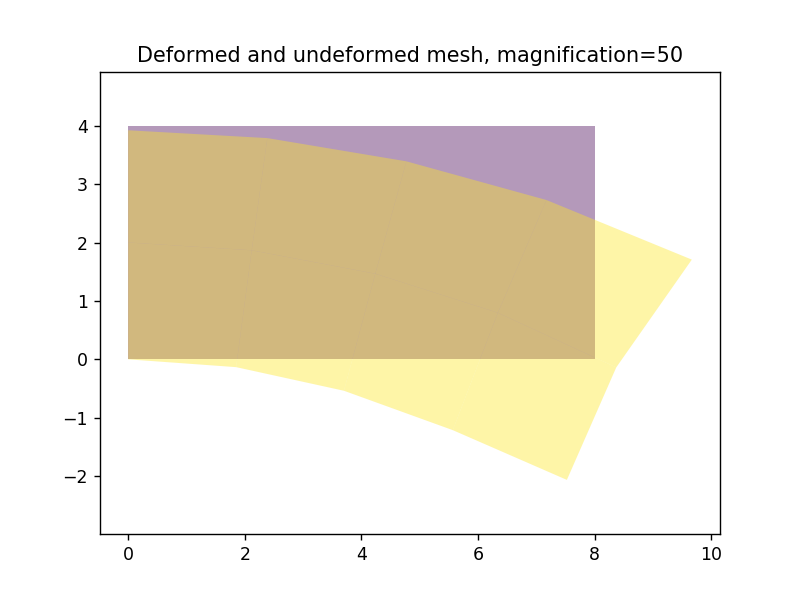

<IPython.core.display.Javascript object>


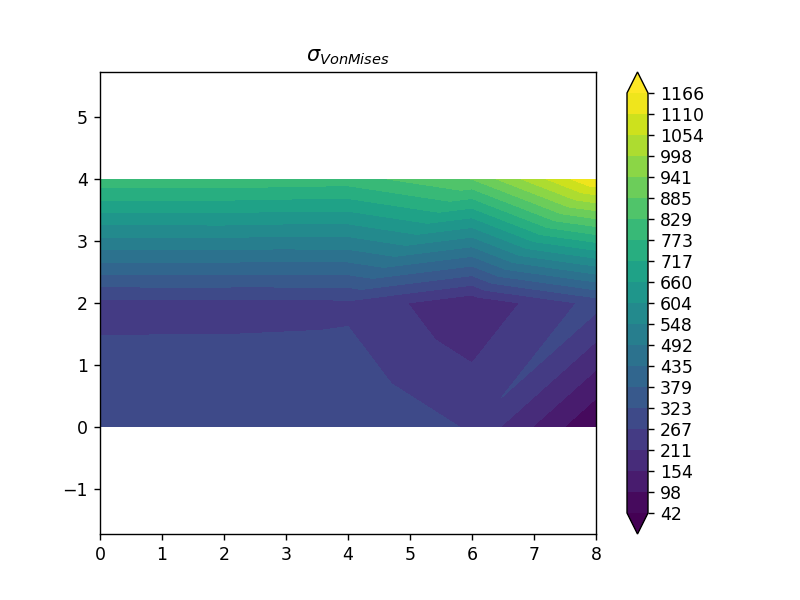

<IPython.core.display.Javascript object>


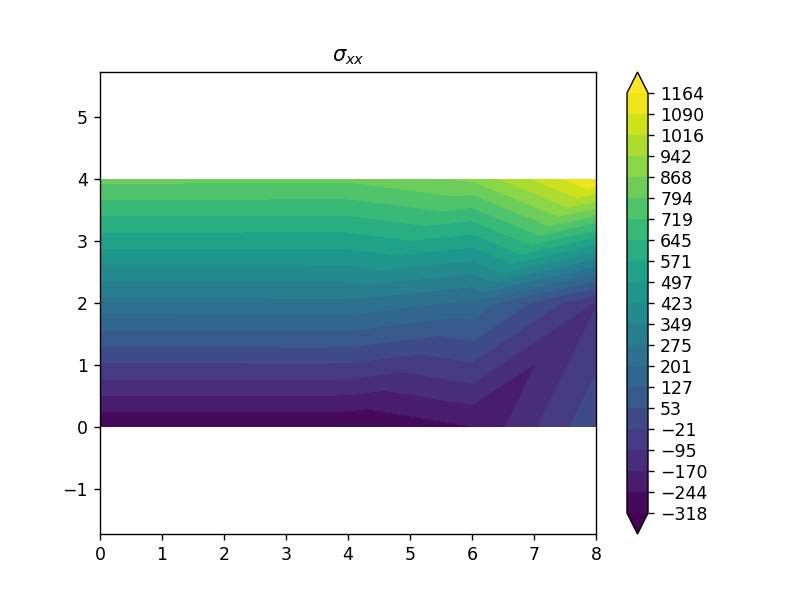

<IPython.core.display.Javascript object>


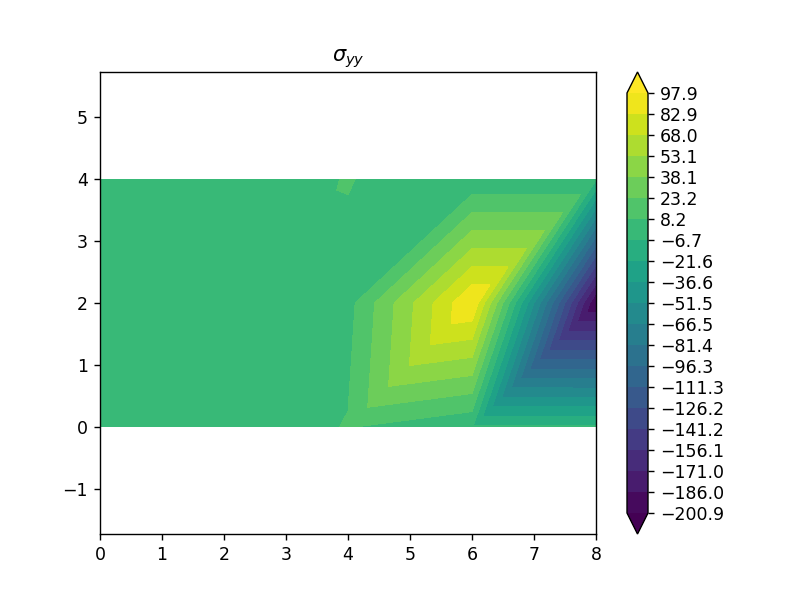

<IPython.core.display.Javascript object>


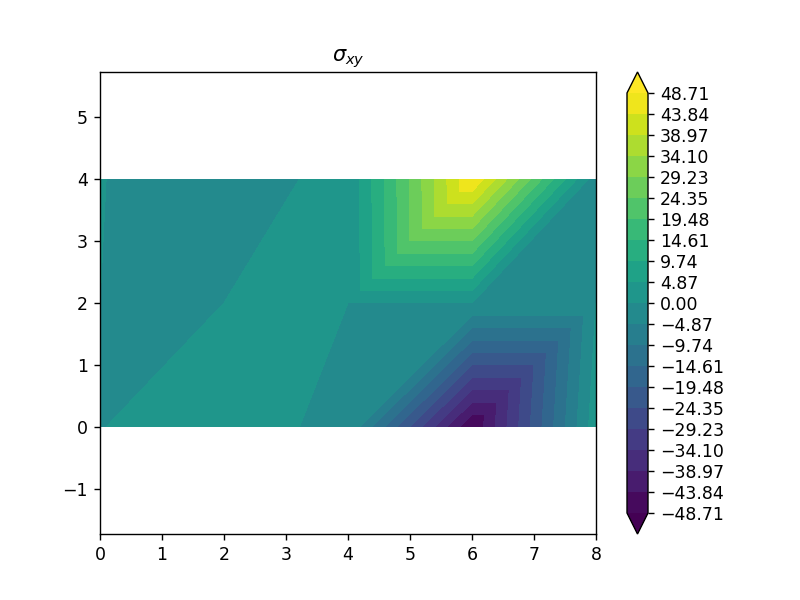

Individual Applied Reaction Forces 
 [[ 1.04221973e+02]
 [-3.86535248e-12]
 [ 4.17127160e+01]
 [-1.66869379e+02]
 [-7.08287284e+02]
 [-2.70778027e+02]]

 Sum Reaction forces along x -1000.0000000000033


In [153]:
%matplotlib notebook
import numpy as np

from fem_main_program import launch_fem
UIC, ReactionForcesIC, VonMisesIC, SXXIC, SYYIC, SXYIC = launch_fem('Q8_Point_Half',MagFac=50)

print('Individual Applied Reaction Forces \n {}'.format(ReactionForcesIC))

print('\n Sum Reaction forces along x {}'.format(np.sum(ReactionForcesIC)))

### From Node 37 to Node 28 in increments of $\eta=0.2$

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0010 seconds.
Done assembling K and F    :   0.0150 seconds.
Done solving system        :   0.0000 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0050 seconds.
Done post-processing stress:   0.0040 seconds.
Done writing output        :   0.0010 seconds.


<IPython.core.display.Javascript object>


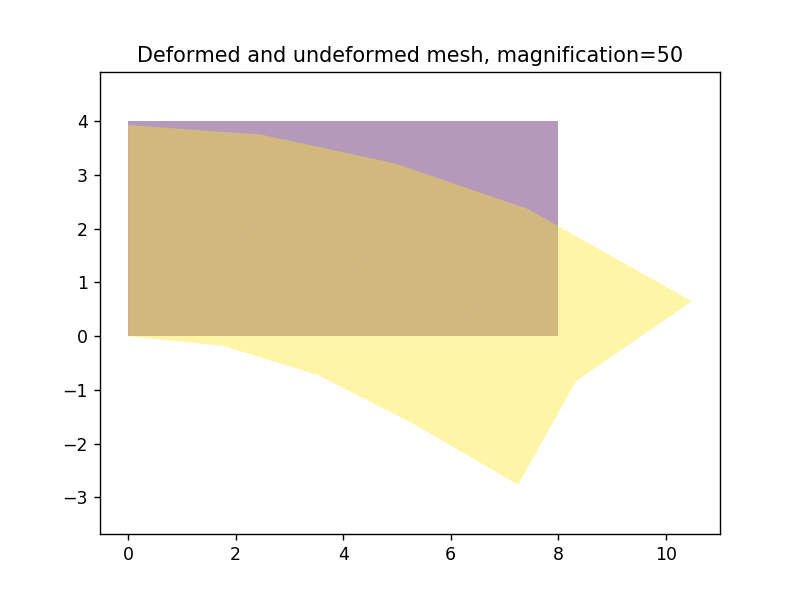

<IPython.core.display.Javascript object>


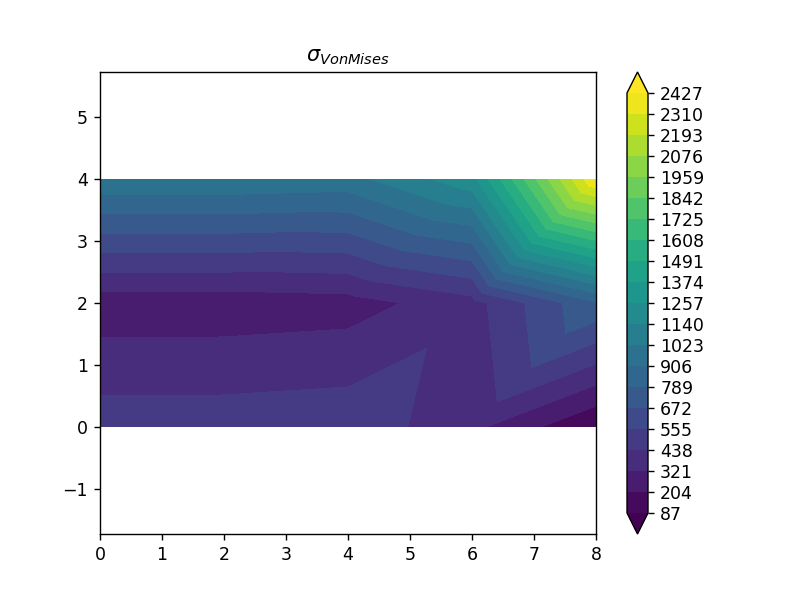

<IPython.core.display.Javascript object>


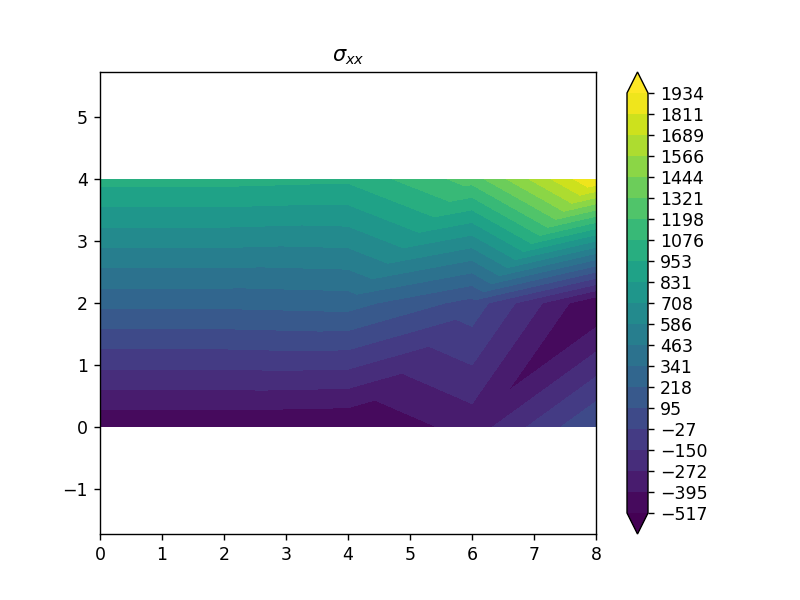

<IPython.core.display.Javascript object>


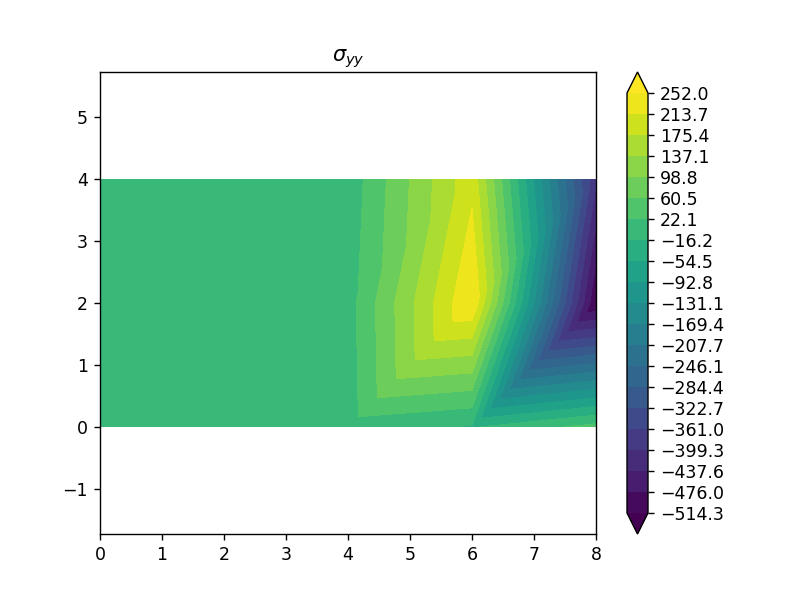

<IPython.core.display.Javascript object>


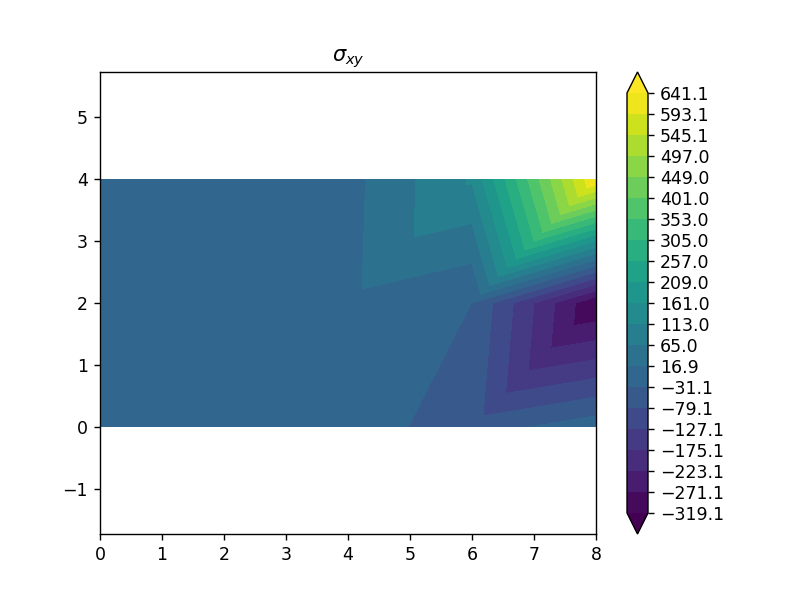

Individual Applied Reaction Forces 
 [[ 1.66597077e+02]
 [-5.74118530e-12]
 [ 1.67138774e+02]
 [-1.67412289e+02]
 [-8.32980053e+02]
 [-3.33343510e+02]]
You can Confirm this distribution is the same as the consistent nodal load split - see next question

 Sum Reaction forces along x -1000.0000000000058


In [71]:
%matplotlib notebook
import numpy as np

from fem_main_program import launch_fem
UIC, ReactionForcesIC, VonMisesIC, SXXIC, SYYIC, SXYIC = launch_fem('Q8_Point_1_1',MagFac=50)

print('Individual Applied Reaction Forces \n {}'.format(ReactionForcesIC))
print('You can Confirm this distribution is the same as the consistent nodal load split - see next question')

print('\n Sum Reaction forces along x {}'.format(np.sum(ReactionForcesIC)))

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0020 seconds.
Done assembling K and F    :   0.0110 seconds.
Done solving system        :   0.0000 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0040 seconds.
Done post-processing stress:   0.0030 seconds.
Done writing output        :   0.0010 seconds.


<IPython.core.display.Javascript object>


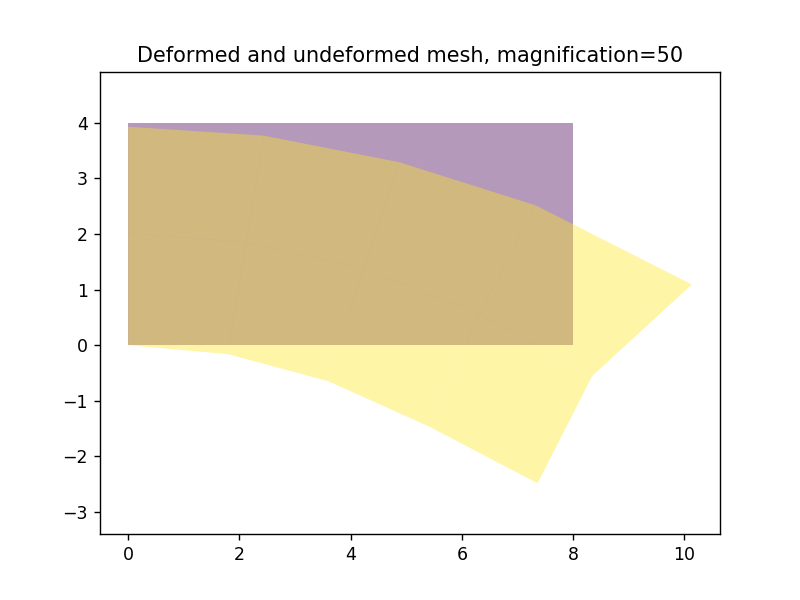

<IPython.core.display.Javascript object>


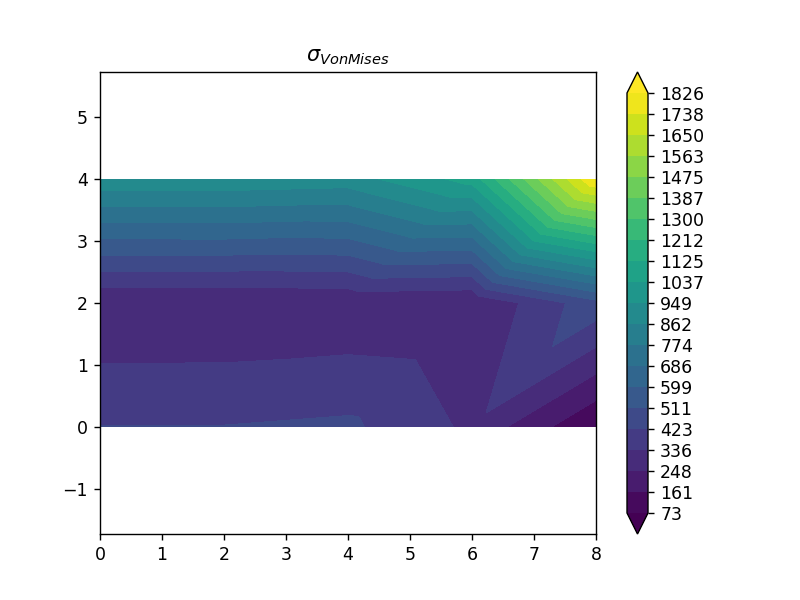

<IPython.core.display.Javascript object>


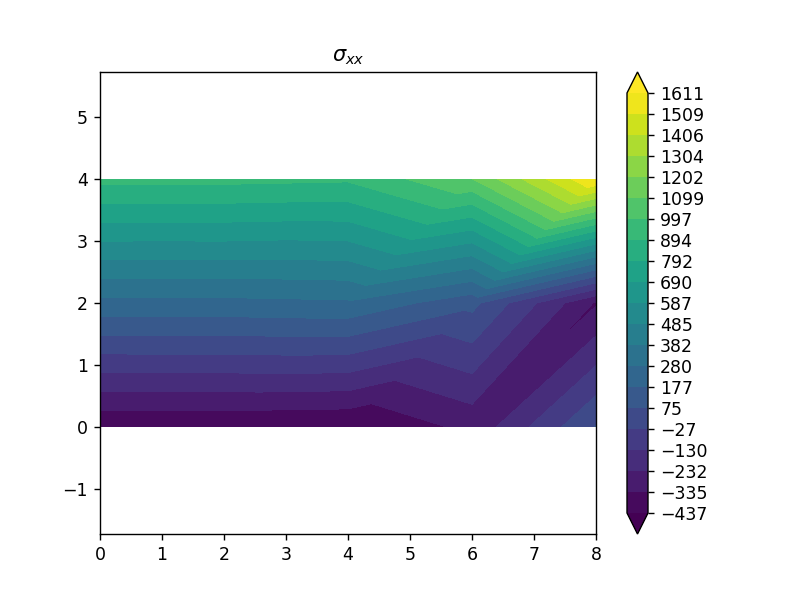

<IPython.core.display.Javascript object>


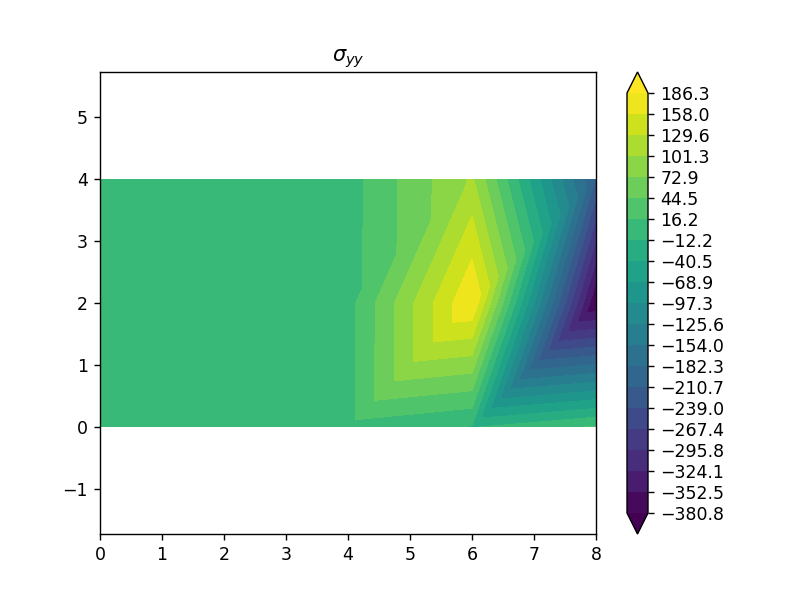

<IPython.core.display.Javascript object>


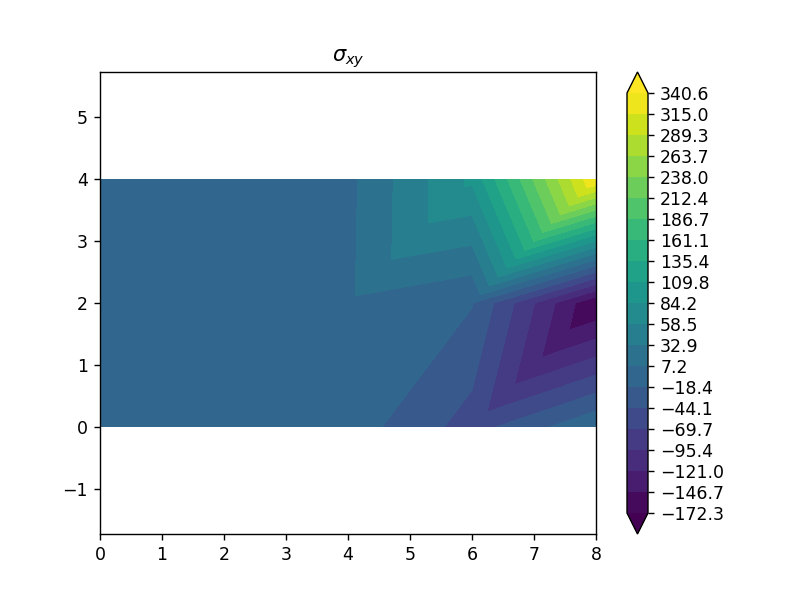

Individual Applied Reaction Forces 
 [[ 1.41659654e+02]
 [-4.86011231e-12]
 [ 1.16941703e+02]
 [-1.67170630e+02]
 [-7.83122463e+02]
 [-3.08308263e+02]]

 Sum Reaction forces along x -1000.0000000000039


In [72]:
%matplotlib notebook
import numpy as np

from fem_main_program import launch_fem
UIC, ReactionForcesIC, VonMisesIC, SXXIC, SYYIC, SXYIC = launch_fem('Q8_Point_1_2',MagFac=50)

print('Individual Applied Reaction Forces \n {}'.format(ReactionForcesIC))

print('\n Sum Reaction forces along x {}'.format(np.sum(ReactionForcesIC)))

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0080 seconds.
Done assembling K and F    :   0.0120 seconds.
Done solving system        :   0.0010 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0040 seconds.
Done post-processing stress:   0.0030 seconds.
Done writing output        :   0.0010 seconds.


<IPython.core.display.Javascript object>


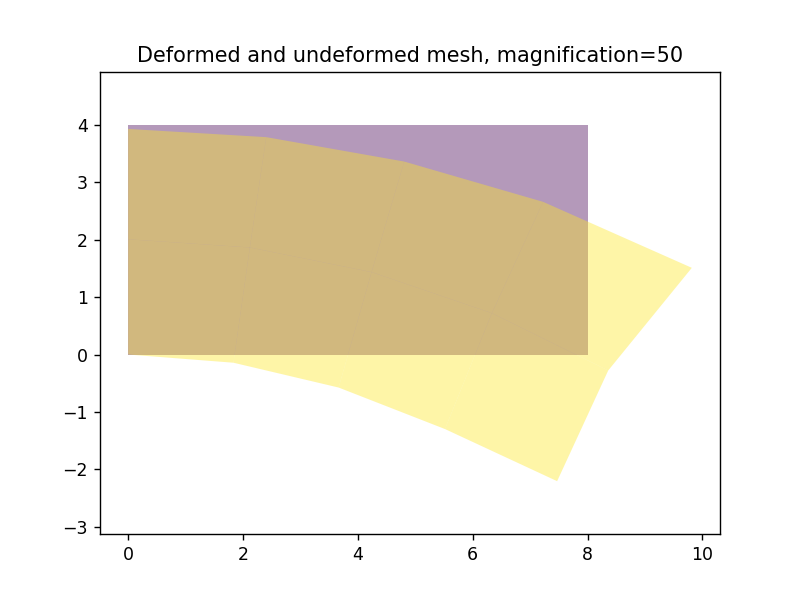

<IPython.core.display.Javascript object>


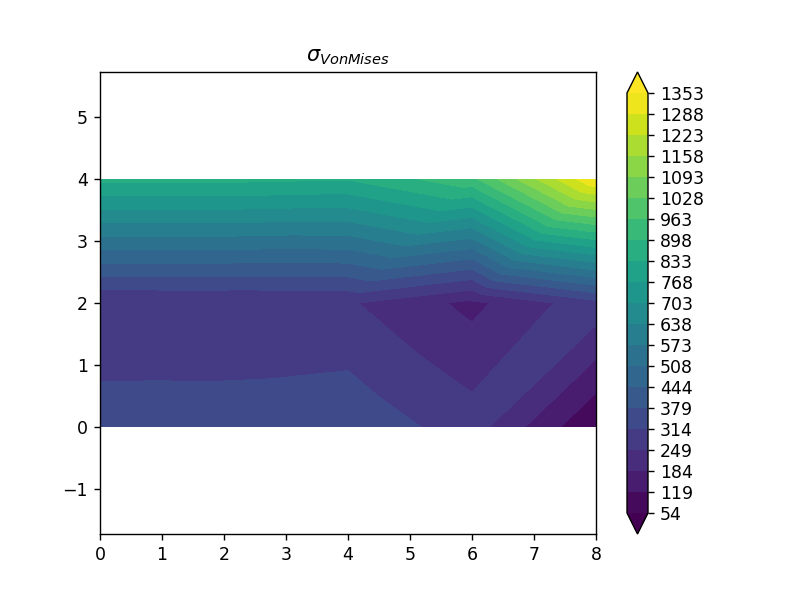

<IPython.core.display.Javascript object>


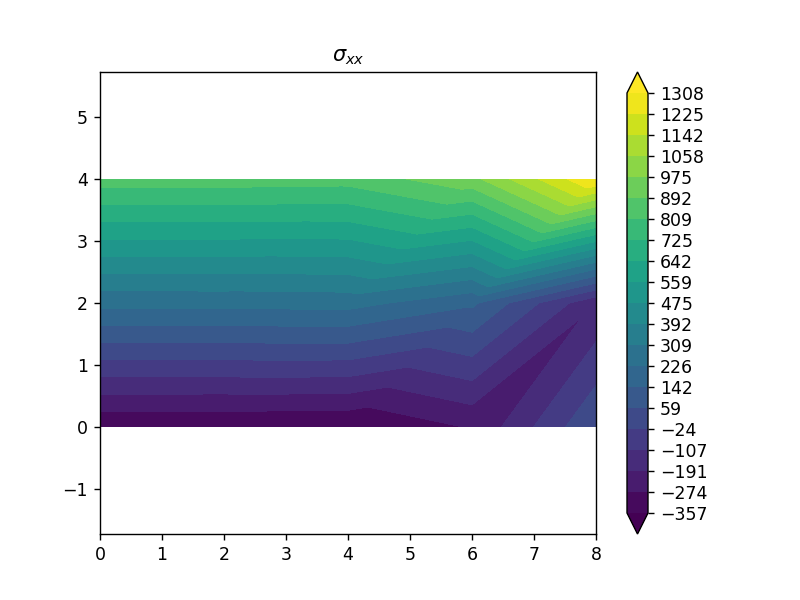

<IPython.core.display.Javascript object>


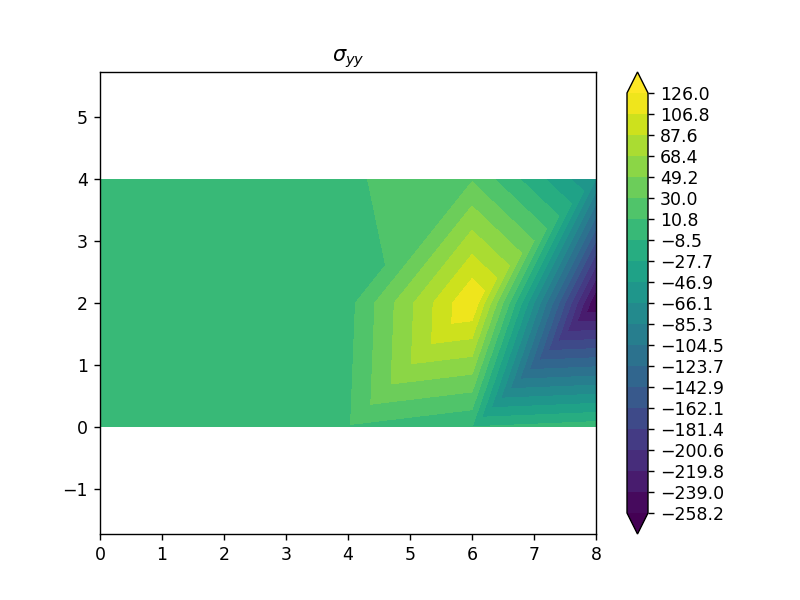

<IPython.core.display.Javascript object>


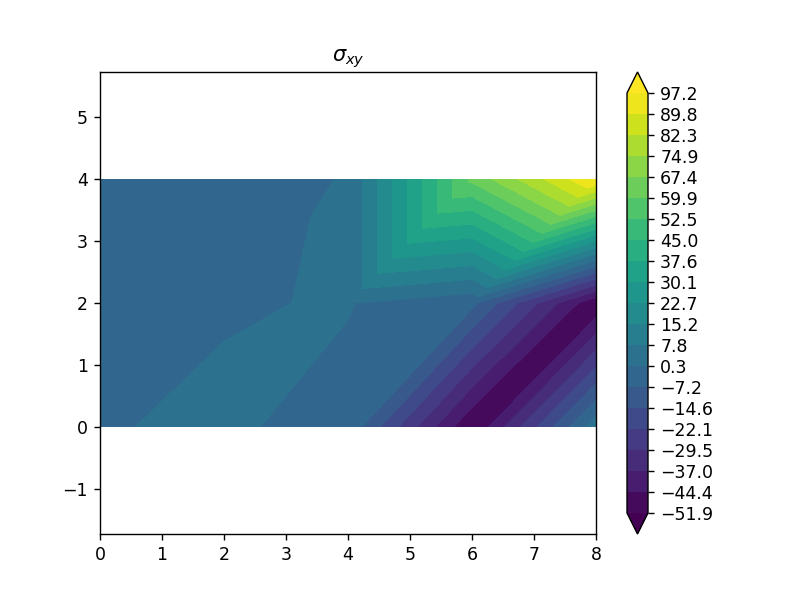

Individual Applied Reaction Forces 
 [[ 1.16705406e+02]
 [-4.20641300e-12]
 [ 6.67801625e+01]
 [-1.66961631e+02]
 [-7.33238850e+02]
 [-2.83285088e+02]]

 Sum Reaction forces along x -1000.0000000000027


In [73]:
%matplotlib notebook
import numpy as np

from fem_main_program import launch_fem
UIC, ReactionForcesIC, VonMisesIC, SXXIC, SYYIC, SXYIC = launch_fem('Q8_Point_1_3',MagFac=50)

print('Individual Applied Reaction Forces \n {}'.format(ReactionForcesIC))

print('\n Sum Reaction forces along x {}'.format(np.sum(ReactionForcesIC)))

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0065 seconds.
Done assembling K and F    :   0.0120 seconds.
Done solving system        :   0.0000 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0050 seconds.
Done post-processing stress:   0.0030 seconds.
Done writing output        :   0.0010 seconds.


<IPython.core.display.Javascript object>


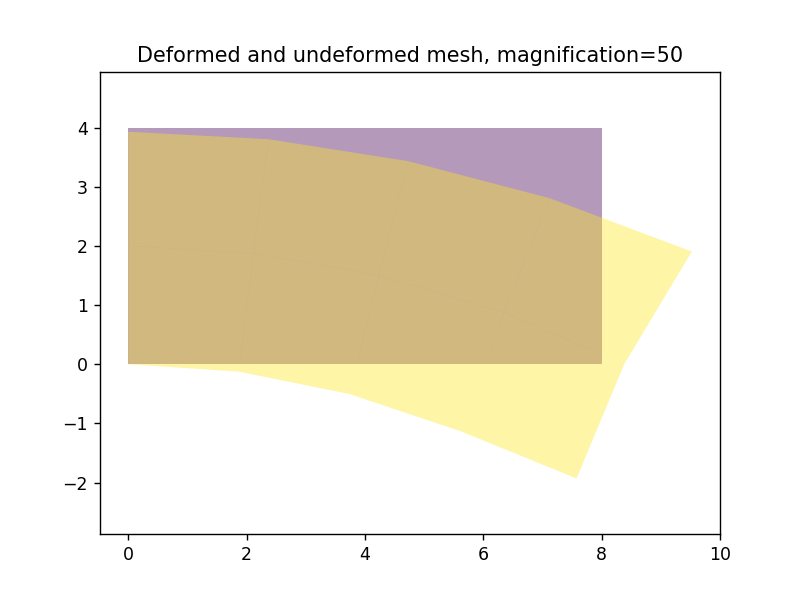

<IPython.core.display.Javascript object>


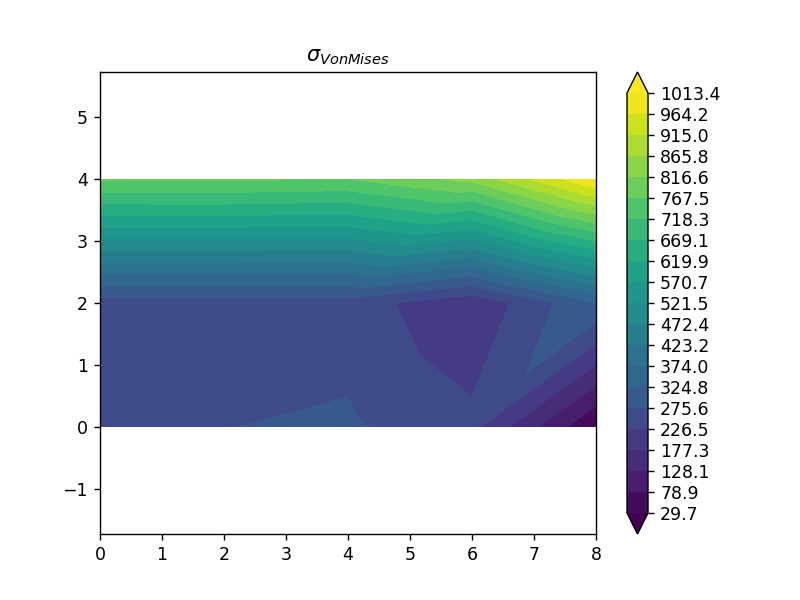

<IPython.core.display.Javascript object>


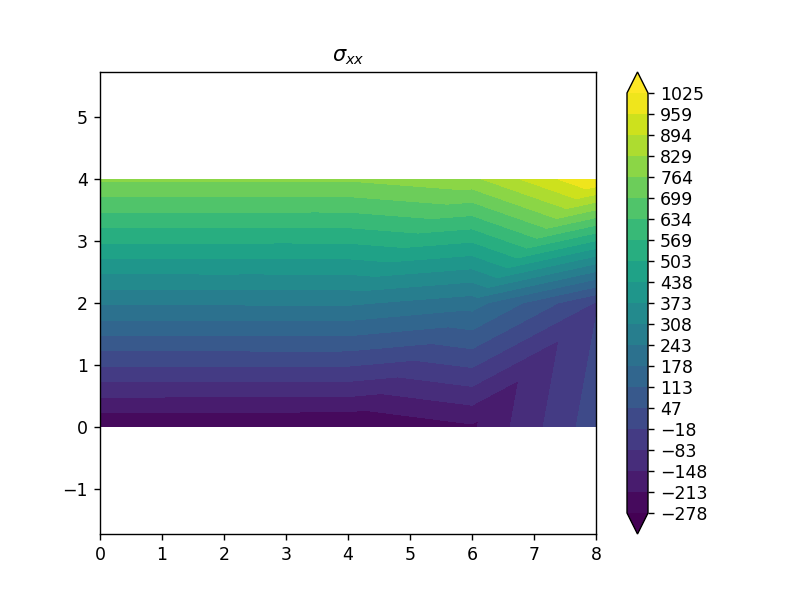

<IPython.core.display.Javascript object>


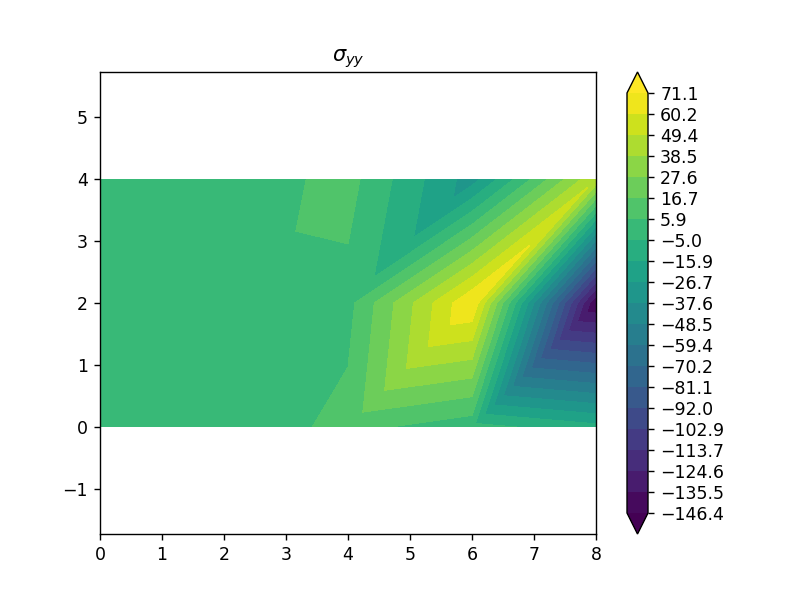

<IPython.core.display.Javascript object>


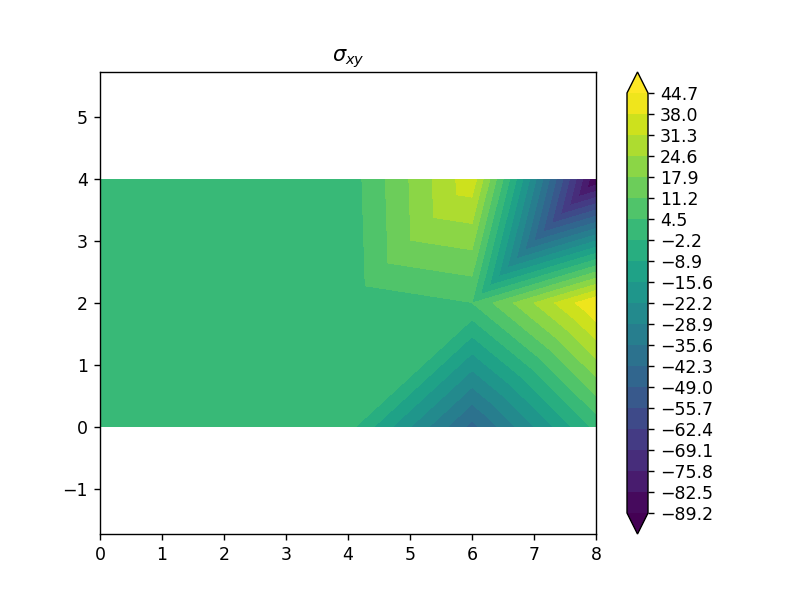

Individual Applied Reaction Forces 
 [[ 9.17343346e+01]
 [-3.32534000e-12]
 [ 1.66541520e+01]
 [-1.66785291e+02]
 [-6.83329212e+02]
 [-2.58273983e+02]]

 Sum Reaction forces along x -1000.0000000000025


In [74]:
%matplotlib notebook
import numpy as np

from fem_main_program import launch_fem
UIC, ReactionForcesIC, VonMisesIC, SXXIC, SYYIC, SXYIC = launch_fem('Q8_Point_1_4',MagFac=50)

print('Individual Applied Reaction Forces \n {}'.format(ReactionForcesIC))

print('\n Sum Reaction forces along x {}'.format(np.sum(ReactionForcesIC)))

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0010 seconds.
Done assembling K and F    :   0.0176 seconds.
Done solving system        :   0.0000 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0070 seconds.
Done post-processing stress:   0.0040 seconds.
Done writing output        :   0.0010 seconds.


<IPython.core.display.Javascript object>


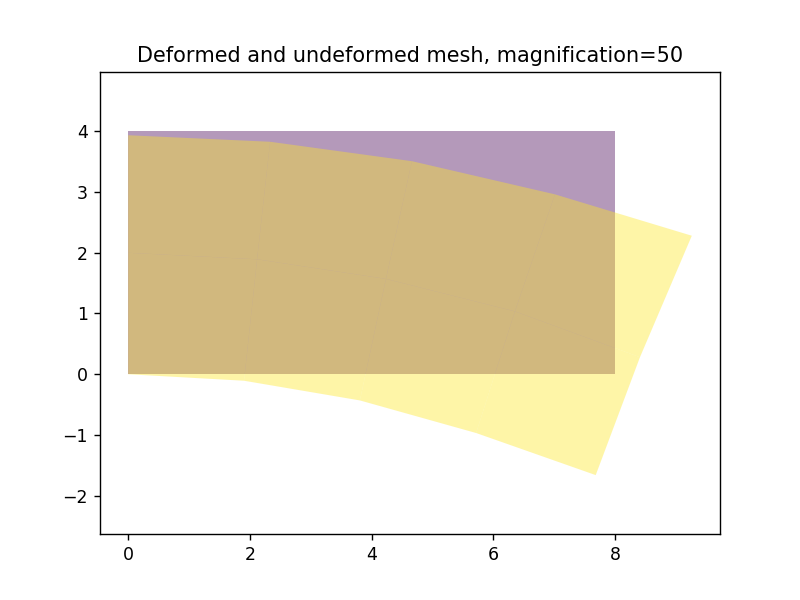

<IPython.core.display.Javascript object>


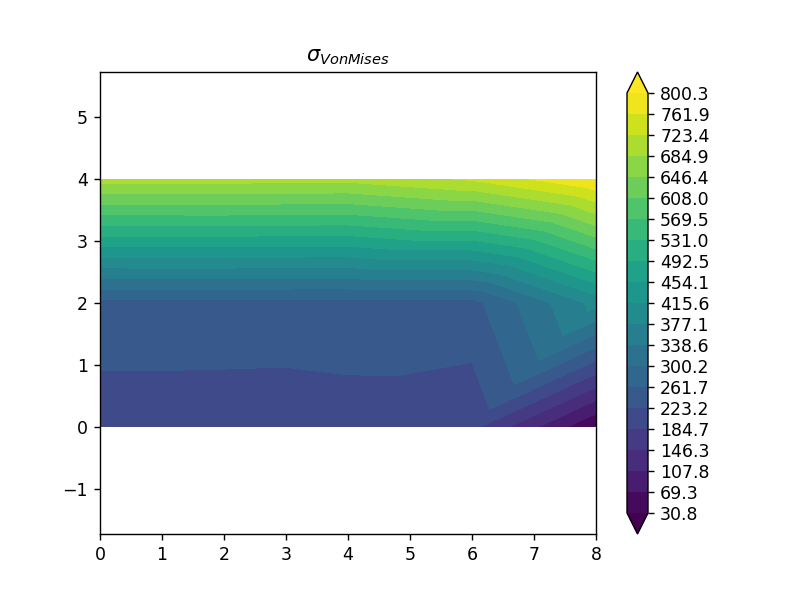

<IPython.core.display.Javascript object>


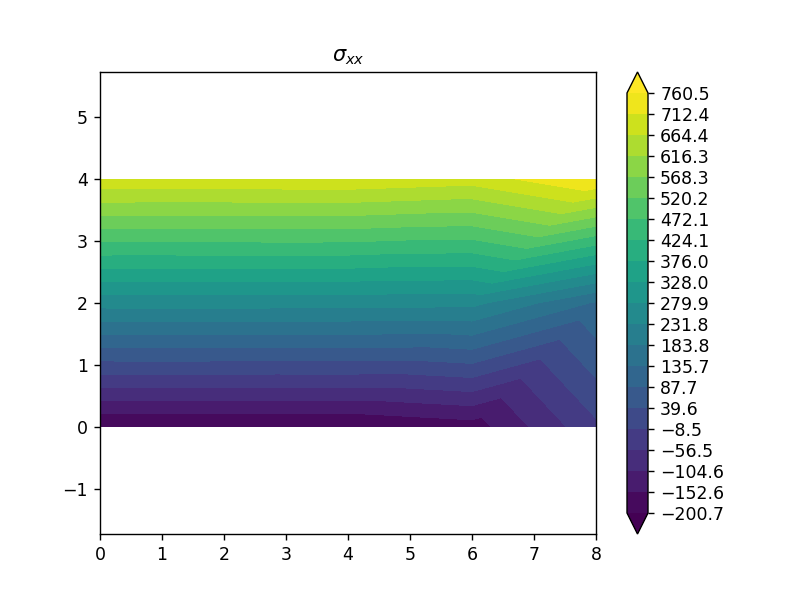

<IPython.core.display.Javascript object>


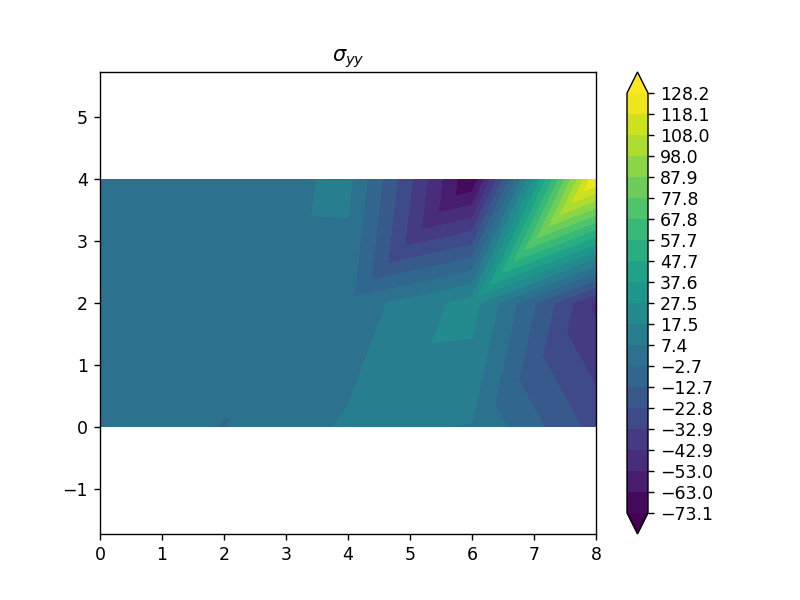

<IPython.core.display.Javascript object>


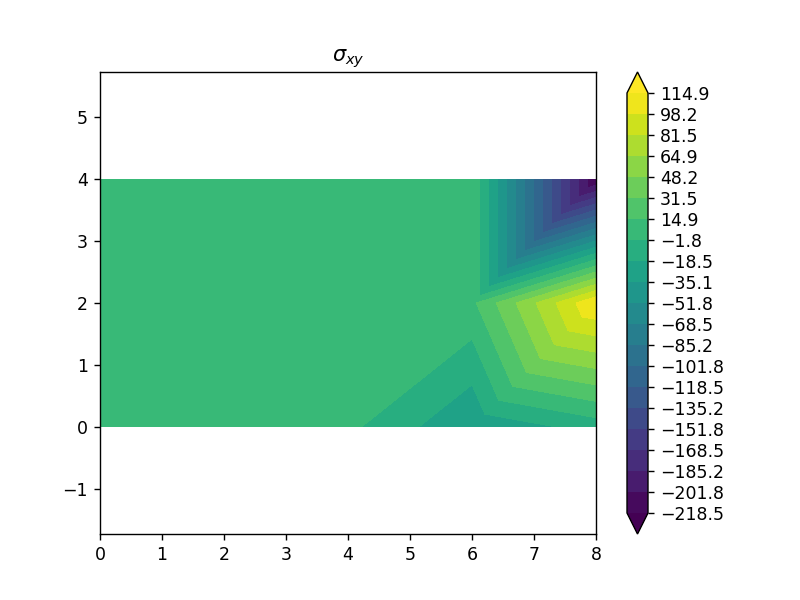

Individual Applied Reaction Forces 
 [[ 6.67464387e+01]
 [-2.81374923e-12]
 [-3.34363283e+01]
 [-1.66641610e+02]
 [-6.33393551e+02]
 [-2.33274950e+02]]

 Sum Reaction forces along x -1000.0000000000018


In [75]:
%matplotlib notebook
import numpy as np

from fem_main_program import launch_fem
UIC, ReactionForcesIC, VonMisesIC, SXXIC, SYYIC, SXYIC = launch_fem('Q8_Point_1_5',MagFac=50)

print('Individual Applied Reaction Forces \n {}'.format(ReactionForcesIC))

print('\n Sum Reaction forces along x {}'.format(np.sum(ReactionForcesIC)))

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0075 seconds.
Done assembling K and F    :   0.0110 seconds.
Done solving system        :   0.0000 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0050 seconds.
Done post-processing stress:   0.0030 seconds.
Done writing output        :   0.0020 seconds.


<IPython.core.display.Javascript object>


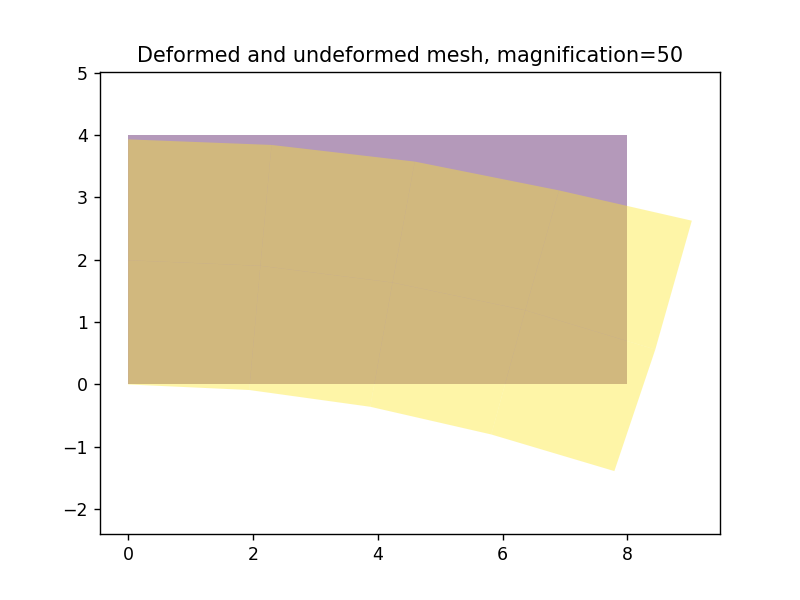

<IPython.core.display.Javascript object>


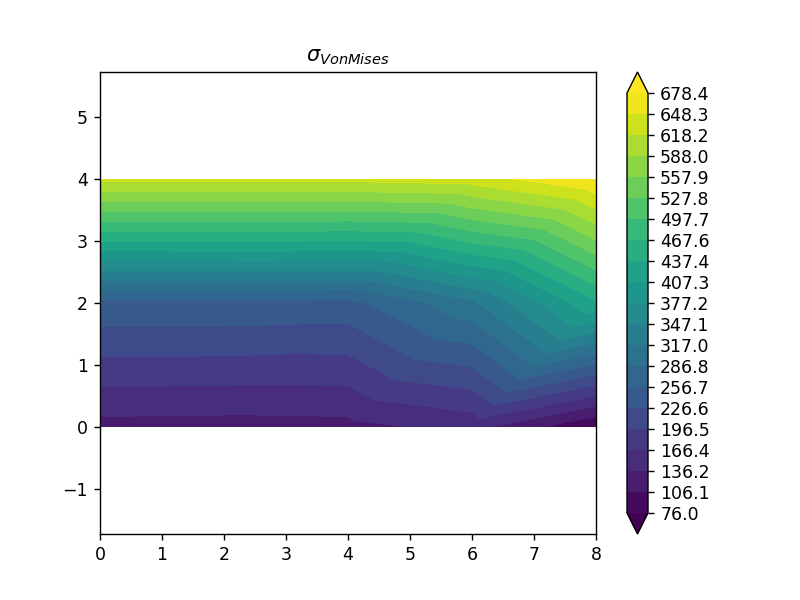

<IPython.core.display.Javascript object>


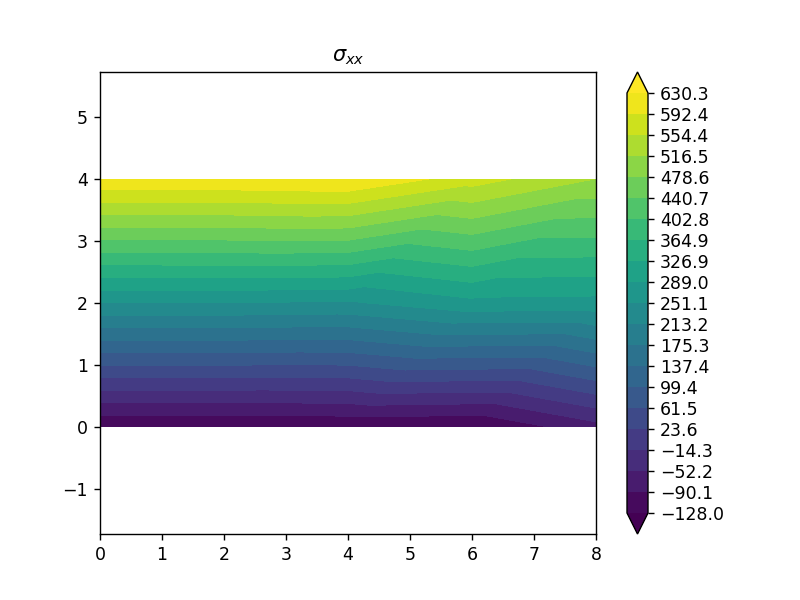

<IPython.core.display.Javascript object>


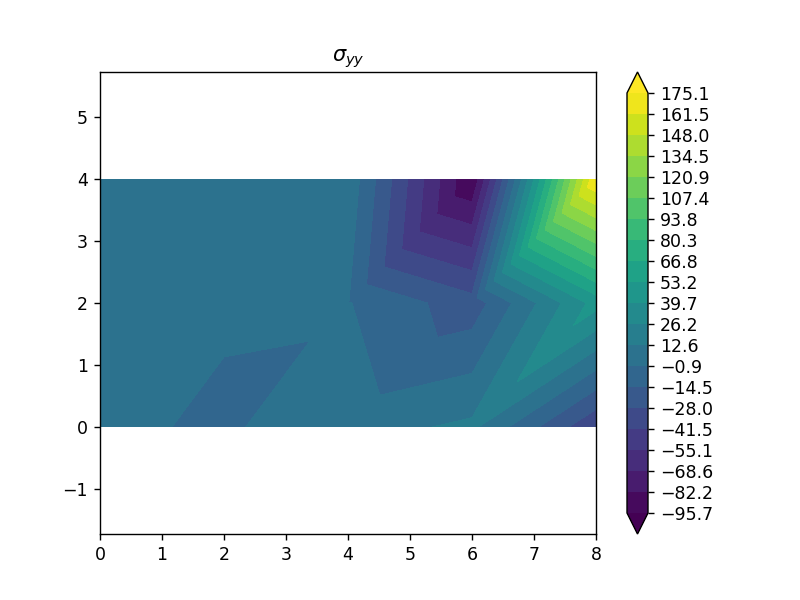

<IPython.core.display.Javascript object>


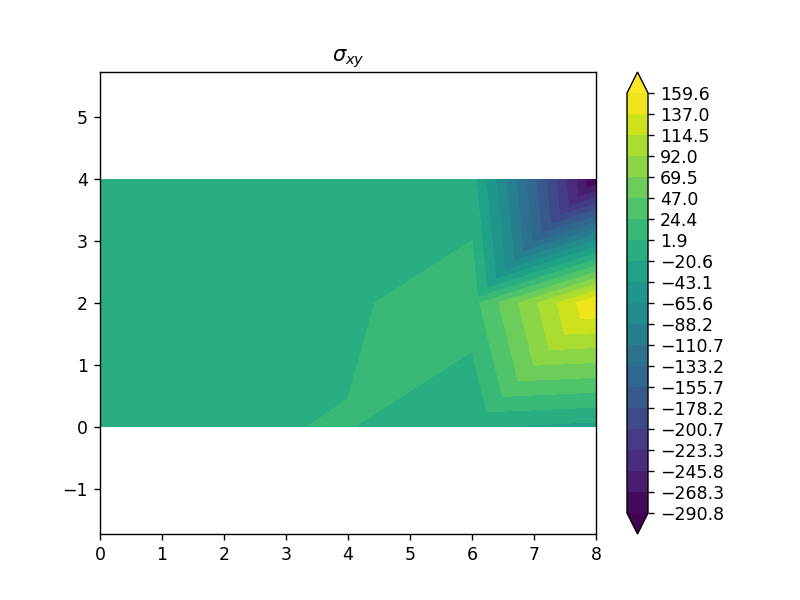

Individual Applied Reaction Forces 
 [[ 4.17417187e+01]
 [-2.33058017e-12]
 [-8.34912783e+01]
 [-1.66530588e+02]
 [-5.83431865e+02]
 [-2.08287988e+02]]

 Sum Reaction forces along x -1000.0000000000006


In [76]:
%matplotlib notebook
import numpy as np

from fem_main_program import launch_fem
UIC, ReactionForcesIC, VonMisesIC, SXXIC, SYYIC, SXYIC = launch_fem('Q8_Point_1_6',MagFac=50)

print('Individual Applied Reaction Forces \n {}'.format(ReactionForcesIC))

print('\n Sum Reaction forces along x {}'.format(np.sum(ReactionForcesIC)))

# Body forces $\int_x\int_y\int_z \mathbf{N}^T \mathbf{f} dV = \int_\xi\int_\eta \mathbf{N}^T \mathbf{f} t\; detJ d\xi d\eta$, where $\mathbf{f}=[f_x,f_y]$ has units N/m^3 and since $dx dy = detJ d\xi d\eta$.
## Consider constant body force of -20 N/mm^3 in the y-direction over a square Q8 element of side length 10mm and thickness 1mm
## Total load is $W = -20\times10\times10\times1=-2000N$

In [156]:
import sympy as sp
xi,eta =  sp.symbols('xi,eta')

N1 = -(1-xi)*(1-eta)*(1+xi+eta)/4
N2 = -(1+xi)*(1-eta)*(1-xi+eta)/4
N3 = -(1+xi)*(1+eta)*(1-xi-eta)/4
N4 = -(1-xi)*(1+eta)*(1+xi-eta)/4
N5 = (1-xi**2)*(1-eta)/2
N6 = (1+xi)*(1-eta**2)/2
N7 = (1-xi**2)*(1 + eta)/2
N8 = (1-xi)*(1 - eta**2)/2

N = sp.Matrix([[N1,0,N2,0,N3,0,N4,0,N5,0,N6,0,N7,0,N8,0],
               [0,N1,0,N2,0,N3,0,N4,0,N5,0,N6,0,N7,0,N8]])

XCoordinates = sp.Matrix([0,0,10,0,10,10,0,10,5,0,10,5,5,10,0,5])
X = N*XCoordinates
X.simplify()

J = sp.derive_by_array(X,[xi,eta])[:,:,0]; print(J)
npJ = np.reshape(np.array(J,dtype=float),(2,2)); 
detJ = np.linalg.det(npJ); print(detJ)

f = sp.Matrix([0,-20])
t = 1

integrand = N.T*f*t*detJ

Load = integrand.subs({xi:-1/3**0.5,eta:-1/3**0.5}) + integrand.subs({xi:1/3**0.5,eta:-1/3**0.5}) + integrand.subs({xi:1/3**0.5,eta:1/3**0.5}) + integrand.subs({xi:-1/3**0.5,eta:1/3**0.5})

print(Load)

print(Load/2000)
print(1/12)
print(1/3)

[[5, 0], [0, 5]]
24.999999999999996
Matrix([[0], [166.666666666667], [0], [166.666666666667], [0], [166.666666666667], [0], [166.666666666667], [0], [-666.666666666667], [0], [-666.666666666666], [0], [-666.666666666666], [0], [-666.666666666666]])
Matrix([[0], [0.0833333333333333], [0], [0.0833333333333333], [0], [0.0833333333333333], [0], [0.0833333333333333], [0], [-0.333333333333333], [0], [-0.333333333333333], [0], [-0.333333333333333], [0], [-0.333333333333333]])
0.08333333333333333
0.3333333333333333


## Quick check with literature out there

In [147]:
from IPython.display import IFrame

url = 'https://mae.ufl.edu/haftka/structII/loads_etc.pdf'
IFrame(url, width=800, height=400)